In [4]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import pandas as pd

In [2]:
def split_feature_label(df):
    y = df['death']
    X = df.drop(columns=['death'])
    return y, X
    # print(X)
    # print(y)

    # death_0 = y.tolist().count(0)
    # death_1 = y.tolist().count(1)
    # percent_death_0 = 100 * death_0 / (death_0 + death_1)
    # percent_death_1 = 100 * death_1 / (death_0 + death_1)
    # print(f'Survived: {death_0}, or {percent_death_0:.2f}%')
    # print(f'Died: {death_1}, or {percent_death_1:.2f}%')

def standardize(X):
    scaler = StandardScaler()
    X_numeric = scaler.fit_transform(X.select_dtypes(include=['float64']))
    X[X.select_dtypes(include=['float64']).columns] = X_numeric
    return X

def train_model(X, y):
    # Split data into training and validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=.3, random_state=42)

    # Define the neural network model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # Input layer
        layers.Dense(128, activation='relu'),     # Hidden layer with 128 neurons and ReLU activation
        layers.Dense(64, activation='relu'),      # Another hidden layer with 64 neurons and ReLU activation
        layers.Dense(1, activation='sigmoid')     # Output layer with sigmoid activation for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    
    model.save('example.h5')

    
    
    print(f'Test accuracy: {test_accuracy}')

    # Optionally, you can plot training history to visualize model performance
    import matplotlib.pyplot as plt

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def run_model1(cleaned_data):
    y, X = split_feature_label(cleaned_data)
    X = standardize(X)
    train_model(X, y)

In [5]:
from preproc import Dataset
df = pd.read_csv("./TD_HOSPITAL_TRAIN.csv")
cleaned_data = Dataset(df).data
print(df.shape,cleaned_data.shape)

(7058, 44) (7058, 57)


/Users/Geetesh/anaconda3/envs/work/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/Geetesh/anaconda3/envs/work/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/Geetesh/anaconda3/envs/work/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/Geetesh/anaconda3/envs/work/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

Epoch 1/50
101/177 [================>.............] - ETA: 0s - loss: 0.4352 - accuracy: 0.7887 

2023-10-28 20:21:10.774730: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


177/177 [==============================] - 0s 906us/step - loss: 0.3928 - accuracy: 0.8128 - val_loss: 0.3892 - val_accuracy: 0.8117
Epoch 2/50
177/177 [==============================] - 0s 572us/step - loss: 0.3085 - accuracy: 0.8603 - val_loss: 0.3661 - val_accuracy: 0.8249
Epoch 3/50
177/177 [==============================] - 0s 581us/step - loss: 0.2813 - accuracy: 0.8700 - val_loss: 0.3275 - val_accuracy: 0.8391
Epoch 4/50
177/177 [==============================] - 0s 561us/step - loss: 0.2578 - accuracy: 0.8852 - val_loss: 0.3218 - val_accuracy: 0.8320
Epoch 5/50
177/177 [==============================] - 0s 569us/step - loss: 0.2402 - accuracy: 0.8893 - val_loss: 0.3462 - val_accuracy: 0.8279
Epoch 6/50
177/177 [==============================] - 0s 572us/step - loss: 0.2243 - accuracy: 0.9035 - val_loss: 0.3096 - val_accuracy: 0.8462
Epoch 7/50
177/177 [==============================] - 0s 573us/step - loss: 0.2064 - accuracy: 0.9095 - val_loss: 0.3399 - val_accuracy: 0.8401
Epo

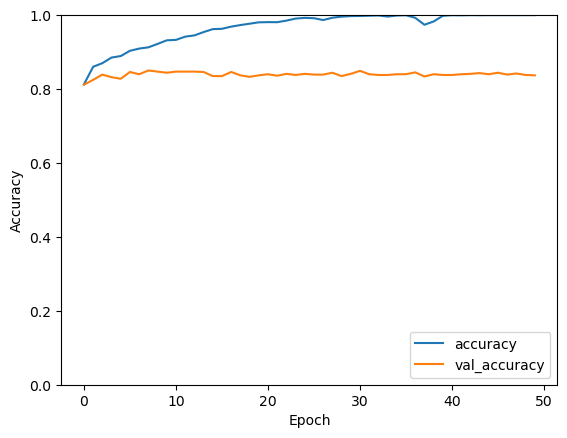

In [6]:
run_model1(cleaned_data)